In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from pactools.grid_search import GridSearchCVProgressBar

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
train=pd.read_csv("Downloads/fashion-mnist_train.csv/fashion-mnist_train.csv")
test=pd.read_csv("Downloads/fashion-mnist_test.csv")

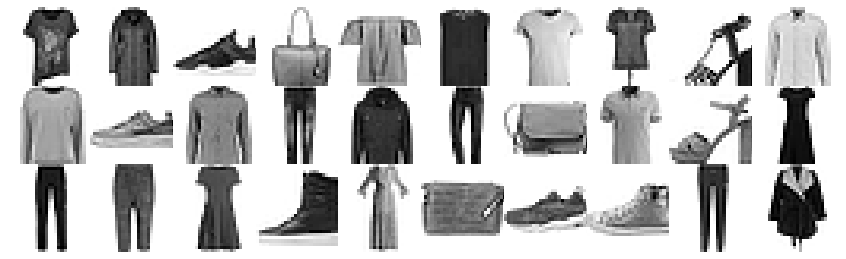

In [4]:
samples = train.iloc[5000:5030,1:].values
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(train.shape,test.shape)

(60000, 785) (10000, 785)


### Visualization

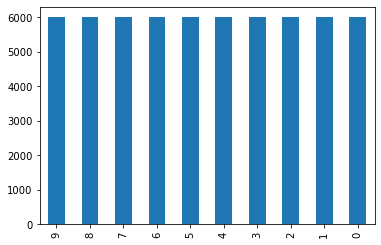

In [7]:
a=train['label'].value_counts().plot(kind='bar')
plt.show()

In [8]:
X = train.drop(['label'], axis = 1, inplace = False)
y = train['label']

In [9]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, train[['label']]], axis = 1)

['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58']


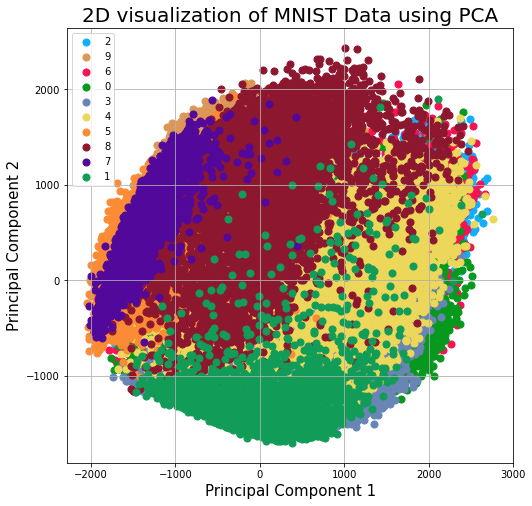

In [10]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(train['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()


In [11]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

(36000, 784) (15000, 784) (9000, 784) (36000,) (15000,) (9000,)


### KNN

In [12]:
def trainKNN(X_train, y_train, k): 
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [13]:
def predictClassifier(X_test, classifier):
    y_pred = classifier.predict(X_test)
    return y_pred

In [14]:
def calculateAccuracy(y_pred, y_test):
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [32]:
kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)     

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [17:26<00:00, 116.27s/it]


In [33]:
AccuracyList

[0.839,
 0.8436666666666667,
 0.8393333333333334,
 0.8353333333333334,
 0.8317777777777777,
 0.8267777777777777,
 0.8242222222222222,
 0.8245555555555556,
 0.8232222222222222]

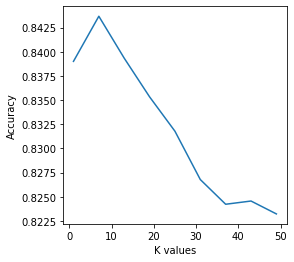

In [34]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [35]:
clf = trainKNN(X_train,y_train, 9)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

Final Accuracy:  0.8303333333333334


################# Confusion Matrix ####################


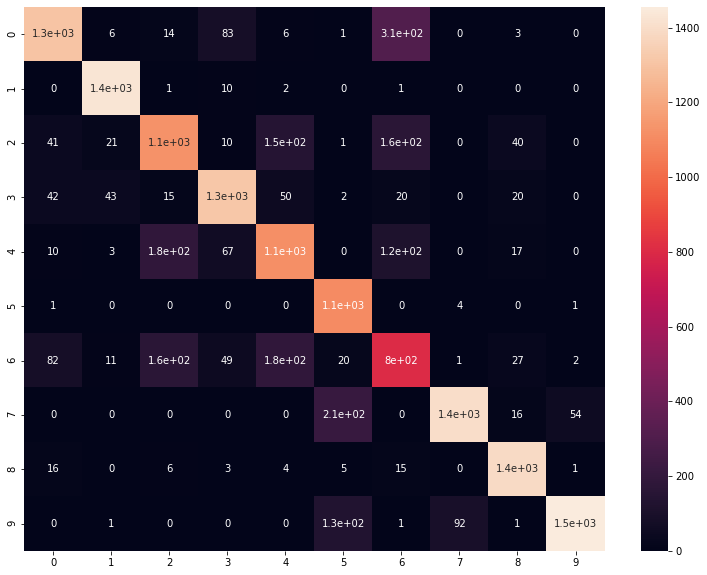

In [36]:
num_digits= np.unique(y)
cf = confusion_matrix(y_pred,y_test, labels = num_digits )
print("################# Confusion Matrix ####################")
fig = plt.figure(figsize = (13,10))
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells


### SVM

In [ ]:
model_to_set = OneVsRestClassifier(SVC())
parameters = {
    "estimator__C": [2**x for x in range(-2,2,1)],
    "estimator__kernel": ["linear","poly","rbf"],
    "estimator__degree":[10**x for x in range(-2,2,1)],
}

model_tunning = GridSearchCV(model_to_set, param_grid=parameters,scoring = "accuracy",cv = 4, verbose = 100)
model_tunning.fit(X_1, y_1)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] estimator__C=0.25, estimator__degree=0.01, estimator__kernel=linear 


In [ ]:
clf = SVC(C=10, gamma=0.001, kernel="rbf")
clf.fit(X_1, y_1)

### Logistic regression

In [12]:
logistic = LogisticRegression(solver='saga', tol=1e-3,n_jobs=1,multi_class = "multinomial")
randVals = []
for i in range(4):
    randVals.append(random.uniform(0,4))
distributions = dict(C=randVals, penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0, verbose = 1000)
search = clf.fit(X_1, y_1)

C:\Users\amraa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] penalty=l2, C=2.0826774385596982 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=2.0826774385596982, score=0.845, total= 3.4min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s
[CV] penalty=l2, C=2.0826774385596982 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=2.0826774385596982, score=0.843, total= 2.7min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.0min remaining:    0.0s
[CV] penalty=l2, C=2.0826774385596982 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=2.0826774385596982, score=0.848, total= 2.7min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.7min remaining:    0.0s
[CV] penalty=l2, C=2.0826774385596982 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=2.0826774385596982, score=0.843, total= 2.5min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 11.2min remaining:    0.0s
[CV] penalty=l2, C=2.0826774385596982 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=2.0826774385596982, score=0.851, total= 2.7min
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.9min remaining:    0.0s
[CV] penalty=l1, C=2.0826774385596982 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=2.0826774385596982, score=0.845, total= 8.8min
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 22.8min remaining:    0.0s
[CV] penalty=l1, C=2.0826774385596982 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=2.0826774385596982, score=0.843, total= 8.5min
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 31.3min remaining:    0.0s
[CV] penalty=l1, C=2.0826774385596982 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=2.0826774385596982, score=0.848, total= 8.6min
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 39.9min remaining:    0.0s
[CV] penalty=l1, C=2.0826774385596982 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=2.0826774385596982, score=0.843, total= 7.9min
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 47.7min remaining:    0.0s
[CV] penalty=l1, C=2.0826774385596982 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=2.0826774385596982, score=0.851, total=11.5min
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 59.3min remaining:    0.0s
[CV] penalty=l2, C=1.3110912464883726 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=1.3110912464883726, score=0.845, total= 4.0min
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 63.3min remaining:    0.0s
[CV] penalty=l2, C=1.3110912464883726 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=1.3110912464883726, score=0.843, total= 3.5min
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 66.8min remaining:    0.0s
[CV] penalty=l2, C=1.3110912464883726 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=1.3110912464883726, score=0.848, total= 2.2min
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed: 69.0min remaining:    0.0s
[CV] penalty=l2, C=1.3110912464883726 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=1.3110912464883726, score=0.843, total= 2.4min
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 71.4min remaining:    0.0s
[CV] penalty=l2, C=1.3110912464883726 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=1.3110912464883726, score=0.851, total= 2.4min
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 73.8min remaining:    0.0s
[CV] penalty=l1, C=1.3110912464883726 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=1.3110912464883726, score=0.845, total= 8.1min
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 82.0min remaining:    0.0s
[CV] penalty=l1, C=1.3110912464883726 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=1.3110912464883726, score=0.843, total= 8.7min
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed: 90.7min remaining:    0.0s
[CV] penalty=l1, C=1.3110912464883726 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=1.3110912464883726, score=0.848, total= 8.9min
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 99.5min remaining:    0.0s
[CV] penalty=l1, C=1.3110912464883726 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=1.3110912464883726, score=0.843, total= 8.9min
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed: 108.5min remaining:    0.0s
[CV] penalty=l1, C=1.3110912464883726 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=1.3110912464883726, score=0.851, total= 7.6min
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 116.1min remaining:    0.0s
[CV] penalty=l2, C=0.9999867067456014 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=0.9999867067456014, score=0.845, total= 2.5min
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 118.5min remaining:    0.0s
[CV] penalty=l2, C=0.9999867067456014 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=0.9999867067456014, score=0.843, total= 2.3min
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed: 120.9min remaining:    0.0s
[CV] penalty=l2, C=0.9999867067456014 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=0.9999867067456014, score=0.848, total= 2.2min
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed: 123.1min remaining:    0.0s
[CV] penalty=l2, C=0.9999867067456014 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=0.9999867067456014, score=0.843, total= 2.2min
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 125.3min remaining:    0.0s
[CV] penalty=l2, C=0.9999867067456014 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=0.9999867067456014, score=0.851, total= 2.2min
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 127.5min remaining:    0.0s
[CV] penalty=l1, C=0.9999867067456014 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=0.9999867067456014, score=0.845, total= 7.5min
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed: 134.9min remaining:    0.0s
[CV] penalty=l1, C=0.9999867067456014 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=0.9999867067456014, score=0.843, total= 7.4min
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 142.4min remaining:    0.0s
[CV] penalty=l1, C=0.9999867067456014 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=0.9999867067456014, score=0.848, total= 7.4min
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed: 149.8min remaining:    0.0s
[CV] penalty=l1, C=0.9999867067456014 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=0.9999867067456014, score=0.843, total= 7.4min
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed: 157.2min remaining:    0.0s
[CV] penalty=l1, C=0.9999867067456014 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=0.9999867067456014, score=0.851, total= 7.6min
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 164.8min remaining:    0.0s
[CV] penalty=l2, C=3.8112676365836466 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=3.8112676365836466, score=0.845, total= 2.2min
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed: 167.0min remaining:    0.0s
[CV] penalty=l2, C=3.8112676365836466 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=3.8112676365836466, score=0.842, total= 2.2min
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 169.2min remaining:    0.0s
[CV] penalty=l2, C=3.8112676365836466 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=3.8112676365836466, score=0.848, total= 2.2min
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 171.4min remaining:    0.0s
[CV] penalty=l2, C=3.8112676365836466 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=3.8112676365836466, score=0.843, total= 2.2min
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed: 173.6min remaining:    0.0s
[CV] penalty=l2, C=3.8112676365836466 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l2, C=3.8112676365836466, score=0.851, total= 2.3min
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 175.9min remaining:    0.0s
[CV] penalty=l1, C=3.8112676365836466 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=3.8112676365836466, score=0.845, total= 7.7min
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 183.6min remaining:    0.0s
[CV] penalty=l1, C=3.8112676365836466 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=3.8112676365836466, score=0.843, total= 7.5min
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed: 191.1min remaining:    0.0s
[CV] penalty=l1, C=3.8112676365836466 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=3.8112676365836466, score=0.848, total= 7.4min
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed: 198.6min remaining:    0.0s
[CV] penalty=l1, C=3.8112676365836466 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=3.8112676365836466, score=0.843, total= 7.4min
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed: 206.0min remaining:    0.0s
[CV] penalty=l1, C=3.8112676365836466 ................................


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... penalty=l1, C=3.8112676365836466, score=0.851, total= 7.4min
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 213.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 213.4min finished


C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [13]:
print(clf.best_estimator_)
print(clf.best_score_)

LogisticRegression(C=0.9999867067456014, multi_class='multinomial', n_jobs=1,
                   penalty='l1', solver='saga', tol=0.001)
0.8459555555555556


In [14]:
best_clf = clf.best_estimator_
best_clf.fit(X_1,y_1)

C:\Users\amraa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.9999867067456014, multi_class='multinomial', n_jobs=1,
                   penalty='l1', solver='saga', tol=0.001)

In [15]:
y_predLR = best_clf.predict(X_test)
acc = accuracy_score(y_test,y_predLR)
print(acc)

0.8460666666666666


### Decission tree

In [12]:
maxDepth = [4,6,8,10,12,15,20,30,50,80, 120]
trainAcc = []
CVAcc = []
for depth in tqdm(maxDepth):
    clfDT = DecisionTreeClassifier(criterion='gini',max_depth = depth)
    clfDT.fit(X_train, y_train)
    y_predDTtrain = clfDT.predict(X_train)
    y_predDTcv = clfDT.predict(X_cv)
    accTr = accuracy_score(y_train, y_predDTtrain)
    accCv = accuracy_score(y_cv, y_predDTcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)    

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [02:55<00:00, 15.97s/it]


In [13]:
print(trainAcc)
print(CVAcc)

[0.6397777777777778, 0.7399444444444444, 0.8004166666666667, 0.854, 0.8927222222222222, 0.9475555555555556, 0.9882222222222222, 0.9990555555555556, 1.0, 1.0, 1.0]
[0.6344444444444445, 0.7311111111111112, 0.779, 0.8054444444444444, 0.8058888888888889, 0.8036666666666666, 0.7955555555555556, 0.7882222222222223, 0.784, 0.7886666666666666, 0.7841111111111111]


In [17]:
def plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVAcc,label='CV Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    
    trainError = [1-x for x in trainAcc]
    CVError    = [1-x for x in CVAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVError,label='CV Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

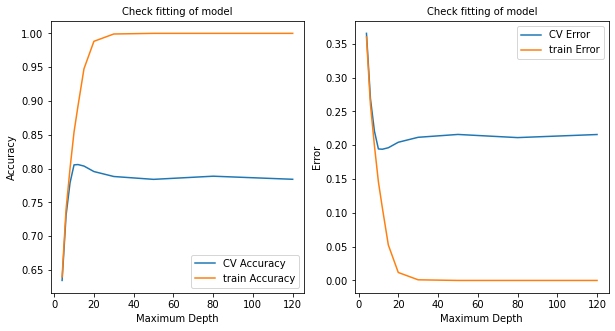

In [15]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth)

In [12]:
clfDT = clfDT = DecisionTreeClassifier(criterion='gini',max_depth = 15)
clfDT.fit(X_train, y_train)
y_pred = clfDT.predict(X_test)

print("Final Accuracy DT: ",accuracy_score(y_test,y_pred))

Final Accuracy DT:  0.8008666666666666


### Random forest

In [14]:
NoEstimators = [50,70,100,130,150,190,230,290,370,450,550,700]
trainAcc = []
CVAcc = []

In [15]:
for est in tqdm(NoEstimators):
    clfRF = RandomForestClassifier(n_estimators=est, criterion='gini')
    clfRF.fit(X_train, y_train)
    y_predRFtrain = clfRF.predict(X_train)
    y_predRFcv = clfRF.predict(X_cv)
    accTr = accuracy_score(y_train, y_predRFtrain)
    accCv = accuracy_score(y_cv, y_predRFcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv) 

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [28:46<00:00, 143.84s/it]


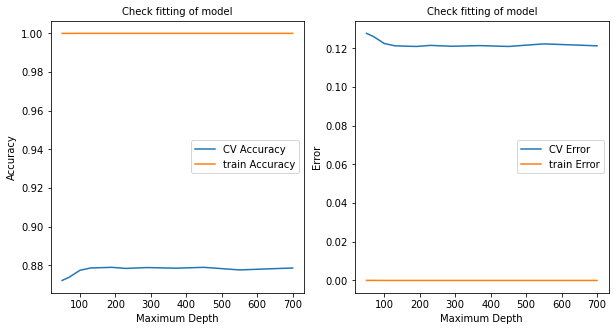

In [18]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,NoEstimators)

In [19]:
maxAccuracy = max(CVAcc)
maxAccuracy

0.879

In [20]:
!pip install xgboAost

ERROR: Could not find a version that satisfies the requirement xgboAost (from versions: none)
ERROR: No matching distribution found for xgboAost


In [4]:
etaVals = [0.1,0.3,0.5,0.6,0.8,0.9] # Shrinkage parameter as hyperparameter
#max_depth parameter we are changing as we know increasing this value may turn model into overfit
trainAcc = []
CVAcc = []
for e in etaVals:
    model = XGBClassifier(eta = e, nthread = 2)
    model.fit(X_train,y_train)
    y_predXGtrain = model.predict(X_train)
    y_predXGcv = model.predict(X_cv)
    accTr = accuracy_score(y_train, y_predXGtrain)
    accCv = accuracy_score(y_cv, y_predXGcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)     

NameError: name 'XGBClassifier' is not defined

# accuracy
Knn=0.83   
svm=--   
logistic regression=0.84   
random forest=0.87  
decision tree=0.80  
xg boost=